# PROJET 3 : ANALYSE DE SEQUENCES GENOMIQUES

## Binôme : BOUKHALFI Mourad et BESSOUL Amine
Non inscrits au module 3I019


In [1]:
# CODE FOURNI 
import io
import math
import numpy as np


#Définition des nucléotides
nucleotide = {'A':0,'C':1,'G':2,'T':3}
nucleotide_indetermine = {'A':0,'C':1,'G':2,'T':3,'N':-1}

def decode_sequence(sequence):
    inv_nucleotide = {v:k for k, v in nucleotide_indetermine.items()}
    to_str = ""
    for i in sequence:
        if(i in inv_nucleotide):
            to_str += inv_nucleotide[i]
        else:
            to_str += 'N'
    return to_str
    

def encode_sequence(string):
    to_list = []
    for base in string:
        if(base in nucleotide_indetermine):
            to_list.append(nucleotide_indetermine[base])
    return to_list

def read_fasta(fasta_filepath):
    fasta_file = io.open(fasta_filepath, 'r')
    current_sequence = ""
    sequences_dict = {}
    for line in fasta_file.readlines():
        if(line[0] == '>'):
            current_sequence = line
            sequences_dict[line] = []
        else:
            for nucl in line:
                if(nucl in nucleotide_indetermine):
                    sequences_dict[current_sequence].append(nucleotide_indetermine[nucl])
            
                
    return sequences_dict
    
def nucleotide_count(sequence):
    count = [0 for k in nucleotide]
    for nucl in sequence:
        if(nucl >= 0):
            count[nucl] += 1
    return count

def nucleotide_frequency(sequence):
    count = [0 for k in nucleotide]
    n_nucl = 0.
    for nucl in sequence:
        if(nucl >= 0):
            count[nucl] += 1
            n_nucl += 1.
    return count/(np.sum(count))

In [4]:
PHO = read_fasta("regulatory_seq_PHO.fasta")
clés = PHO.keys()
for key in clés :
    print("Clé : ", key,"\n Valeurs :",PHO[key],"\n")

Clé :  >PHO5	PHO5; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001134.7:430946:431745:R
 
 Valeurs : [3, 3, 3, 3, 0, 1, 0, 1, 0, 3, 1, 2, 2, 0, 1, 3, 2, 0, 3, 0, 0, 2, 3, 3, 0, 1, 3, 0, 1, 3, 2, 1, 0, 1, 0, 3, 3, 2, 2, 1, 0, 3, 3, 0, 2, 1, 3, 0, 2, 2, 0, 2, 2, 2, 1, 0, 3, 1, 1, 0, 0, 2, 3, 0, 0, 3, 0, 0, 3, 3, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 3, 2, 0, 1, 1, 1, 0, 0, 1, 3, 3, 3, 2, 3, 3, 2, 3, 0, 2, 2, 3, 1, 1, 2, 1, 3, 1, 1, 3, 3, 1, 3, 0, 0, 3, 0, 0, 3, 1, 2, 1, 3, 3, 2, 3, 0, 3, 1, 3, 1, 3, 0, 1, 0, 3, 0, 3, 2, 3, 3, 1, 3, 0, 3, 3, 3, 0, 1, 3, 2, 0, 1, 1, 2, 0, 0, 0, 2, 3, 0, 2, 1, 3, 1, 2, 1, 3, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3, 3, 2, 0, 1, 1, 3, 2, 0, 3, 2, 3, 1, 0, 2, 3, 1, 1, 1, 1, 0, 1, 2, 1, 3, 0, 0, 3, 0, 2, 1, 2, 2, 1, 2, 3, 2, 3, 1, 2, 1, 0, 1, 2, 1, 3, 1, 3, 1, 3, 3, 3, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 0, 3, 3, 0, 1, 0, 0, 2, 2, 0, 3, 1, 1, 2, 0, 0, 0, 2, 3, 3, 2, 3, 0, 3, 3, 1, 0, 0, 1, 0, 0, 2, 

In [5]:
GAL = read_fasta("regulatory_seqs_GAL.fasta")
clés = GAL.keys()
for key in clés :
    print("Clé : ", key,"\n Valeurs :",GAL[key],"\n")

Clé :  >GAL1	GAL1; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001134.7:278221:279020:D
 
 Valeurs : [1, 0, 2, 2, 3, 3, 0, 3, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 3, 1, 0, 3, 0, 3, 1, 1, 0, 3, 3, 1, 3, 1, 0, 0, 3, 3, 0, 2, 1, 3, 1, 3, 0, 1, 1, 0, 1, 0, 2, 3, 2, 3, 2, 3, 2, 0, 0, 1, 1, 0, 0, 3, 2, 3, 0, 3, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 3, 2, 3, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 3, 3, 3, 3, 0, 2, 0, 0, 2, 3, 0, 1, 3, 3, 3, 1, 0, 1, 3, 3, 3, 2, 3, 0, 0, 1, 3, 2, 0, 2, 1, 3, 2, 3, 1, 0, 3, 3, 3, 0, 3, 0, 3, 3, 2, 0, 0, 3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 3, 3, 1, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 0, 3, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 3, 3, 3, 0, 0, 3, 0, 0, 3, 1, 0, 3, 0, 3, 3, 0, 1, 0, 3, 2, 2, 1, 0, 3, 3, 0, 1, 1, 0, 1, 1, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 1, 1, 0, 3, 0, 3, 1, 3, 0, 0, 3, 1, 3, 3, 0, 1, 3, 3, 0, 3, 0, 3, 2, 3, 3, 2, 3, 2, 2, 0, 0, 0, 3, 2, 3, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 3, 3, 0, 3, 1, 3, 3, 0, 2, 1, 1, 

In [6]:
MET = read_fasta("regulatory_seqs_MET.fasta")
clés = MET.keys()
for key in clés :
    print("Clé : ", key,"\n Valeurs :",MET[key],"\n")

Clé :  >MET1	MET1; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001143.7:570454:571253:D
 
 Valeurs : [2, 3, 3, 0, 2, 1, 2, 3, 0, 0, 0, 3, 0, 0, 3, 3, 1, 3, 2, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 0, 2, 0, 3, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 0, 3, 2, 2, 1, 1, 3, 3, 1, 0, 0, 0, 2, 0, 1, 1, 3, 1, 2, 0, 3, 3, 2, 1, 2, 3, 2, 2, 3, 0, 2, 0, 0, 0, 1, 1, 0, 3, 3, 3, 3, 3, 2, 0, 1, 1, 1, 0, 2, 3, 3, 3, 3, 2, 2, 3, 3, 0, 3, 1, 0, 0, 3, 2, 0, 0, 1, 0, 1, 3, 3, 2, 0, 0, 2, 1, 3, 3, 3, 0, 1, 3, 1, 3, 2, 1, 0, 3, 3, 1, 1, 1, 0, 3, 1, 3, 1, 3, 0, 3, 0, 2, 1, 3, 0, 3, 2, 2, 2, 3, 0, 0, 3, 1, 0, 1, 0, 2, 1, 3, 0, 1, 2, 0, 3, 1, 0, 1, 3, 3, 0, 1, 3, 1, 3, 2, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 2, 3, 3, 1, 0, 0, 3, 2, 3, 3, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 3, 0, 0, 1, 0, 3, 2, 3, 0, 0, 1, 0, 1, 3, 3, 3, 1, 0, 2, 2, 3, 3, 2, 2, 1, 1, 3, 3, 0, 1, 1, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 0, 2, 3, 3, 3, 1, 2, 1, 0, 

#### Séquence du Saccharomyces Cerevisiae :

In [17]:
seq_scerevisae = read_fasta("yeast_s_cerevisae_genomic_chr1-4.fna")

### Question 2.1

In [18]:
somme=0
for i in range(len(seq_scerevisae.keys())):
    liste = list(seq_scerevisae.values())[i]
    print("Liste des occurences de nucléotides : ", nucleotide_count(liste))
    somme += sum(nucleotide_count(liste))
print("Nombre total de nucléotides :", somme)

Liste des occurences de nucléotides :  [59043, 41019, 41611, 58814]
Liste des occurences de nucléotides :  [212499, 144544, 142052, 214569]
Liste des occurences de nucléotides :  [82833, 57146, 54745, 80982]
Liste des occurences de nucléotides :  [399967, 263234, 264755, 398040]
Nombre total de nucléotides : 2515853


### Question 2.2

In [37]:
liste_probas = nucleotide_frequency(liste)
print(liste_probas)

TypeError: list indices must be integers or slices, not numpy.float64

SyntaxError: invalid syntax (<ipython-input-34-cb862723e8a8>, line 1)

Estimation des fréquences des lettres sur le génome de S. cerevisae :
 Fréquence de A : 0.2944979 ; Fréquence de C : 0.2045968 ; Fréquence de G : 0.20754962 ; Fréquence de T : 0.29335568

### Question 2.3

In [45]:
def logproba(liste_entiers, m):
    """
         calcule la log-probabilité d’une séquence étant donné les fréquences des lettres m
    """
    res = 0
    for nucl in liste_entiers:
        res += math.log(m[nucl])
    return res

In [46]:
logproba([1, 0, 3], [0.2, 0.3, 0.1, 0.4])

-3.7297014486341915

### Question 2.4

In [47]:
def logprobafast(nucleotide_count, m):
    """
        Calcule la log-probabilité d'une séquence étant donné 
    """
    res = 0
    for nucl in range (len(nucleotide_count)):
        nb_nucl = nucleotide_count[nucl]
        res += math.log(m[nucl]) * nb_nucl
    return res

In [48]:
logprobafast([1,1,0,1], [0.2, 0.3, 0.1, 0.4])

-3.7297014486341915

# Partie 3 : Annotation des régions promoteurs

## 3.1 : Description Empirique, préliminaires

### Question 3.1.1

#### Question a:

In [42]:
def code(m, k):
    """
        Renvoie pour un mot m de taille k son indice dans le tableau ordonné lexicographiquement
    """
    indice = 0
    for i in  range(k):
        lettre = m[k-i-1]
        val = nucleotide[lettre]
        indice +=  val * 4 ** i
    return indice

In [16]:
code("TAC", 3)

49

#### Question b:

In [41]:
def inverse(i, k):
    """
        Renvoie la séquence de longeur k connaissant son indice i dans le tableau ordonné lexicographiquement
    """
    mot = ""
    n = list(nucleotide.keys()) 
    for a in range(0, k):
        val = (i % (4 ** (a+1))) // (4 ** a)
        lettre = n[val]
        mot = lettre + mot
    return mot 

In [32]:
inverse(49, 3)

'TAC'

#### Question c:

In [39]:
def compte_occurences(seq, k):
    """
        Compte le nombre d'occurences pour tous les mots de taille k dans une séquence d'ADN
        en comptant les occurences chevauchantes
    """
    dict_mots = dict()
    
    for i in range(4**k):   #On remplit le dictionnaire avec Clés = Mots du tableau lexicographiques et Valeurs = 0
        mot = inverse(i, k)
        dict_mots[mot] = 0
    
    for i in range(len(seq)-k+1):#Incrementation des valeurs des clés pour chaque mot rencontré sur la sequence
        mot = seq[i : i+k]
        dict_mots[mot] = dict_mots[mot] + 1
    
    return dict_mots

In [45]:
compte_occurences("CGATGGG", 2)

{'AA': 0,
 'AC': 0,
 'AG': 0,
 'AT': 1,
 'CA': 0,
 'CC': 0,
 'CG': 1,
 'CT': 0,
 'GA': 1,
 'GC': 0,
 'GG': 2,
 'GT': 0,
 'TA': 0,
 'TC': 0,
 'TG': 1,
 'TT': 0}

### Question 3.1.2

Si on connait les fréquences des lettres dans le génome, et que l'on considère que les lettres apparaissent successivement et de manière aléatoire, alors le nombre attendu d'occurences pour un mot $w$ dans une séquence de longueur $l$ est :

$$ nb_{occ} = (l-k+1) \times \prod_{n \in w}f(n)$$ 

Avec $k$ la taille du mot et $f(n)$ la fréquence de la lettre $n$.

In [49]:
def comptage_attendu(freq, k, l):
    """
        Revoie les comptages attendus pour tous les mots de longueur k
        - freq : fréquence des nucléotides
        - k : taille des mots
        - l : longueur du génome
    """
    dict_mots = dict()
    
    for i in range(4**k):
        
        mot = inverse(i, k) 
        
        # Conversion du mot en liste d'entier
        liste_entiers = []
        for n in mot :
            liste_entiers.append(nucleotide_indetermine[n])
            
        fmot = math.e ** logprobafast(nucleotide_count(liste_entiers), freq)
        dict_mots[mot] = int((l-k+1) * fmot)
        
    return dict_mots

In [56]:
comptage_attendu([0.5, 0.2, 0.4, 0.3], 2, 100)

{'AA': 24,
 'AC': 9,
 'AG': 19,
 'AT': 14,
 'CA': 9,
 'CC': 3,
 'CG': 7,
 'CT': 5,
 'GA': 19,
 'GC': 7,
 'GG': 15,
 'GT': 11,
 'TA': 14,
 'TC': 5,
 'TG': 11,
 'TT': 8}

### Question 3.1.3

In [76]:
import matplotlib.pyplot as plt
def trace_graphique2D_occurences(seq, k):
    """
        Affiche avec un graphique 2D  :
           le nombre attendu d’occurrences 
           le nombre observé  
       - seq : séquence sous forme d'une liste d'entiers
       - k : longueurs des mots à observer
   """ 
    
    seq_string = decode_sequence(seq)
    freq = nucleotide_frequency(seq)
    l = len(seq)
    print("taille de la séquence : ", l, " nucléotides")
    
    attendu = list(comptage_attendu(freq, k, l).values())
    observe = list(compte_occurences(seq_string, k).values())
    x = [i for i in range(4**k)]
    
    observe_attendu = [observe[i]-attendu[i] for i in x]

    
    plt.plot(x, observe_attendu, label = "Observations - Résultat attendu") 
    plt.plot(x, [0 for i in x], label= "y=0")
    plt.legend(loc="best")
    plt.ylabel("Nombre d'occurences")
    plt.xlabel("indice du mot")
    plt.title("Etude du nombre d'occurence des mots")
    plt.grid()
    plt.show()

#### Préparation des séquences

Afin de simplifier l'analyse et de pouvoir utiliser notre fonction  ci-dessus, nous devons concaténer l'ensemble des séquences de chaque fichier sous forme d'une liste d'entier.

In [77]:
def concatene_sequence(seq):
    """
        Concatène un ensemble de séquences sous forme d'une liste d'entiers
        - seq : dictionnaire des séquences à concaténer
    """
    liste_entiers = []
    for key in seq.keys():
        liste_entiers.extend(seq[key])
    return liste_entiers

In [78]:
seq_PHO_list = concatene_sequence(PHO)
seq_GAL_list = concatene_sequence(GAL)
seq_MET_list = concatene_sequence(MET)
seq_scerevisae_list = list(seq_scerevisae.values())[0]

#### Analyse PHO

taille de la séquence :  4000  nucléotides


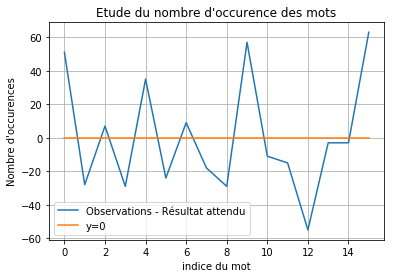

In [80]:
trace_graphique2D_occurences(seq_PHO_list, 2)

taille de la séquence : 4000 nucléotides


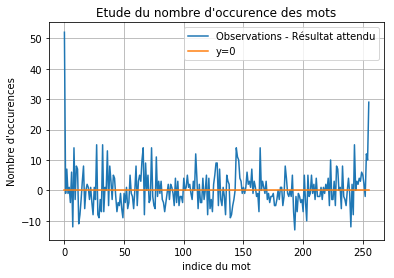

In [74]:
trace_graphique2D_occurences(seq_PHO_list, 4)

taille de la séquence : 4000 nucléotides


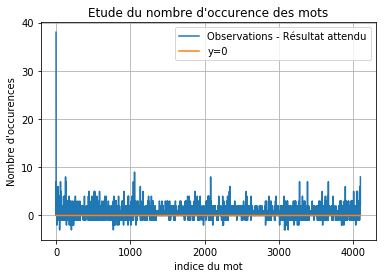

In [75]:
trace_graphique2D_occurences(seq_PHO_list, 6)

taille de la séquence :  4000  nucléotides


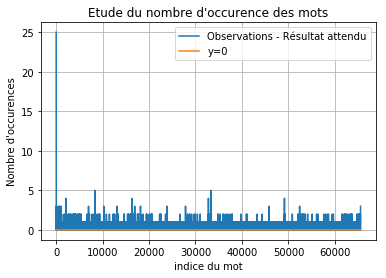

In [81]:
trace_graphique2D_occurences(seq_PHO_list, 8)

#### Analyse GAL

In [38]:
trace_graphique2D_occurences(seq_GAL_list, 2)

NameError: name 'trace_graphique2D_occurences' is not defined

In [85]:
trace_graphique2D_occurences(seq_GAL_list, 4)

taille de la séquence :  5612  nucléotides


KeyError: 'AAAN'

In [86]:
trace_graphique2D_occurences(seq_GAL_list, 6)

taille de la séquence :  5612  nucléotides


KeyError: 'AAAAAN'

In [87]:
trace_graphique2D_occurences(seq_GAL_list, 8)

taille de la séquence :  5612  nucléotides


KeyError: 'AGAAAAAN'

In [88]:
#### Analyse MET

taille de la séquence :  7200  nucléotides


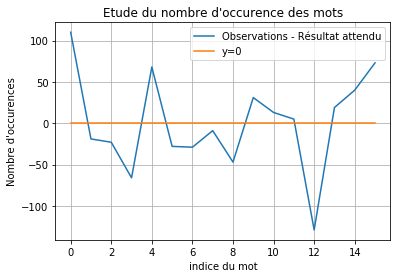

In [89]:
trace_graphique2D_occurences(seq_MET_list, 2)

taille de la séquence :  7200  nucléotides


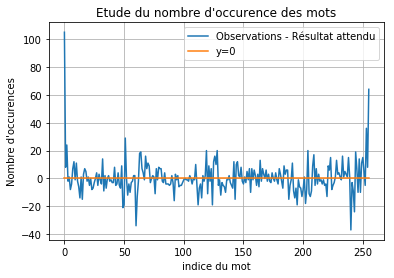

In [90]:
trace_graphique2D_occurences(seq_MET_list, 4)

taille de la séquence :  7200  nucléotides


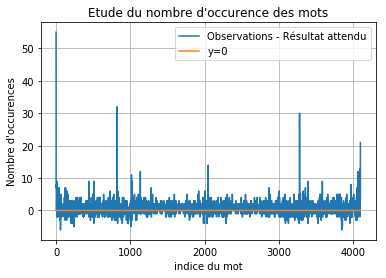

In [91]:
trace_graphique2D_occurences(seq_MET_list, 6)

taille de la séquence :  7200  nucléotides


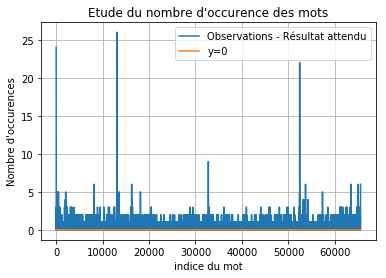

In [92]:
trace_graphique2D_occurences(seq_MET_list, 8)

In [ ]:
## 3.2 : Simulation de séquences aléatoires

In [93]:
def simule_sequence(lg, m):
    """ 
        Génère une séquence aléatoire de longueur lg d'une composition donnée m
    """
    sequence = []
    for i in range(lg):
        sequence.append((np.random.choice([0, 1, 2, 3], p=m)))
    return list(sequence)

In [94]:
simule_sequence(5, [0.25, 0.25, 0.25, 0.25])

[1, 3, 3, 2, 2]

In [95]:
### Question 3.2.2

taille de la séquence :  5000  nucléotides


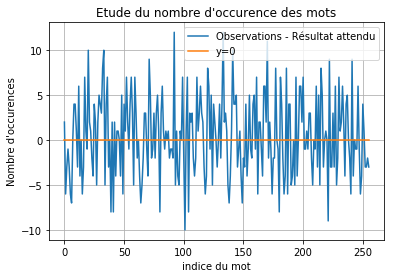

In [96]:
seq_alea = simule_sequence(5000, [0.25, 0.25, 0.25, 0.25])
trace_graphique2D_occurences(seq_alea, 4)

On remarque que la différence entre le nombre d'occurence observé est faible par rapport au résultat attendu. En effet, on a au maximum 6 occurences d'écart alors qu'il y a 250 mots différents et que la séquence compte 500 nucluéotides, ce qui fait 4^500 mots de taille 4 possibles. On peut donc supposer que nos caluls sont valides.

In [ ]:
### Question 3.2.3

In [98]:
def estime_proba_mot(mot, n, lg, m):
    """
        Estime la probabilité empirique d'observer un mot un nombre n de fois 
        dans une séquence de longueur l de distribution m
    """
    nb_obs = 0 # nombre de fois où on observe le mot au moins n fois
    nb_simulations = 100 # Nombre de simulations à effectuer
    for i in range(nb_simulations):
        sequence = simule_sequence(lg, m)
        nb_mot = compte_occurences(decode_sequence(sequence), len(mot))[mot]
        if (nb_mot) >= n:
            nb_obs += 1
    return nb_obs/nb_simulations

In [100]:
estime_proba_mot("ATCTGC", 5, 10000, [0.25, 0.25, 0.25, 0.25])

0.08